In [18]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

In [19]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["bp_smo_canceled", "entropy", "kmeans",10, 30, 0.01, "Adam"])
print(len(runs_bp_smo))
run_ids_smo = get_run_ids(runs_bp_smo)
max(runs_bp_smo['metrics.acc'])

10


0.5796

In [21]:
runs_bp_lmo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate"],[True, True, True, True, True],["bp_lmo_canceled", "entropy", "kmeans", 30, 0.01])
print(len(runs_bp_lmo))
run_ids_bp_lmo = get_run_ids(runs_bp_lmo)
max(runs_bp_lmo['metrics.acc'])

10


0.6201

In [22]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["centroids", "entropy", "kmeans",1000, 30, 0.01, "Adam"])
print(len(runs_centroids))
run_ids_centroids = get_run_ids(runs_centroids)
max(runs_centroids['metrics.acc'])

15


0.5868

In [23]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters"],[True, True, True, True, True, True, True],["bp_prop_clustersize", "entropy", "kmeans",1000, 30, 0.01, 10])
print(len(runs_bp_clusterwise))
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise)
max(runs_bp_clusterwise['metrics.acc'])

10


0.5978

In [24]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters"],[True, True, True, True, True, True, True],["boundary_points", "entropy", "kmeans",1000, 0.01, 30, 10])
print(len(runs_boundary))
run_ids_boundary = get_run_ids(runs_boundary)
max(runs_boundary['metrics.acc'])

10


0.5868

In [7]:
runs_random = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size"],[True, True, True, True],["random", 0.01, 30, 1000])
print(len(runs_random))
run_ids_random = get_run_ids(runs_random)

10


In [25]:
runs_random_uncertain = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size", "params.uncertainty"],[True, True, True, True, True],["random_uncertainty", 0.01, 30, 1000, "entropy"])
print(len(runs_random_uncertain))
run_ids_random = get_run_ids(runs_random_uncertain)
max(runs_random_uncertain['metrics.acc'])

10


0.6012

In [8]:
samples_labeled_bp_smo, avg_accs_bp_smo = get_labeledSamples_avgAcc(run_ids_smo, tracking)
samples_labeled_bp_lmo, avg_accs_bp_lmo = get_labeledSamples_avgAcc(run_ids_bp_lmo, tracking)
samples_labeled_centroids, avg_accs_centroids = get_labeledSamples_avgAcc(run_ids_centroids, tracking)
samples_labeled_clusterwise, avg_accs_clusterwise = get_labeledSamples_avgAcc(run_ids_bp_clusterwise, tracking)
samples_labeled_boundary, avg_accs_boundary = get_labeledSamples_avgAcc(run_ids_boundary, tracking)
samples_labeled_random, avg_accs_random = get_labeledSamples_avgAcc(run_ids_random, tracking)

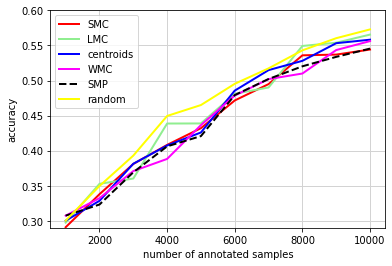

In [9]:
# plot
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='SMC', linewidth=2)
plt.plot(samples_labeled_bp_lmo, avg_accs_bp_lmo,color='lightgreen', label='LMC', linewidth=2)
plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='centroids', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='WMC', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='SMP', linestyle='--',linewidth=2)
plt.plot(samples_labeled_random, avg_accs_random,color='yellow', label='random',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

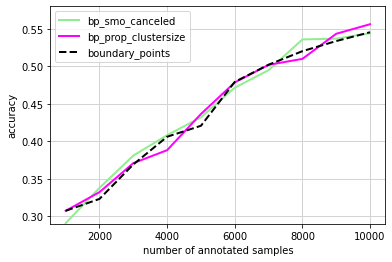

In [10]:
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='lightgreen', label='bp_smo_canceled', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='bp_prop_clustersize', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='boundary_points', linestyle='--',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [11]:
print(f'bp_smo: {avg_accs_bp_smo}')
print(f'bp_lmo: {avg_accs_bp_lmo}')

bp_smo: [0.29083 0.33789 0.38099 0.40821 0.43203 0.47154 0.49487 0.53589 0.53694
 0.54415]
bp_lmo: [0.29735 0.35269 0.36021 0.43866 0.43878 0.48108 0.49007 0.54924 0.55387
 0.56545]


In [12]:
avg_accs_centroids

array([0.30021, 0.32848, 0.38132, 0.40736, 0.42591, 0.48559, 0.51482,
       0.52803, 0.55319, 0.55817])

In [13]:
avg_accs_clusterwise

array([0.30732, 0.33223, 0.3709 , 0.3882 , 0.43642, 0.47855, 0.50201,
       0.50994, 0.54343, 0.55617])

In [14]:
avg_accs_bp_lmo

array([0.29735, 0.35269, 0.36021, 0.43866, 0.43878, 0.48108, 0.49007,
       0.54924, 0.55387, 0.56545])

In [15]:
avg_accs_bp_smo

array([0.29083, 0.33789, 0.38099, 0.40821, 0.43203, 0.47154, 0.49487,
       0.53589, 0.53694, 0.54415])

In [16]:
avg_accs_boundary

array([0.30732, 0.32319, 0.36915, 0.40609, 0.42075, 0.47924, 0.50215,
       0.52023, 0.53371, 0.54549])

In [17]:
avg_accs_random

array([0.30021, 0.34958, 0.39294, 0.44946, 0.46501, 0.49528, 0.51731,
       0.543  , 0.56033, 0.57283])